<font color='orange'>**Please create your own copy before starting modification**</font>

Dependencies: Add Your dependencies here



In [257]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Load the data

In [258]:
data = pd.read_csv('/content/train.csv')

In [259]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [260]:
data.shape

(7613, 5)

## Plot the count for each target

In [261]:
data["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

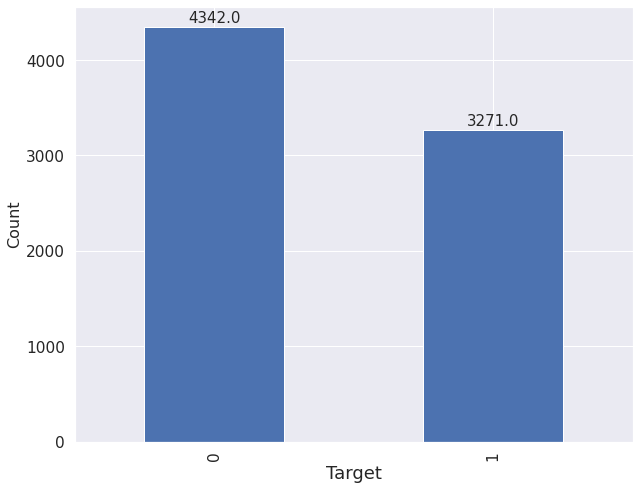

In [262]:
plt.rcParams["figure.figsize"] = (10, 8)
fig = plt.figure()
plt.xlabel('Target', fontsize=18)
plt.ylabel('Count', fontsize=16)
splot = data['target'].value_counts().plot.bar()
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), size = 15,
                   textcoords = 'offset points')


Print the unique keywords

In [263]:
data.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [264]:
unique_keywords = data.keyword.unique()

In [265]:
type(unique_keywords)

numpy.ndarray

In [266]:
print(unique_keywords)

[nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devastated'
 'devastation' 'disaster' 'displaced' 'droug

In [267]:
len(unique_keywords)

222

Plot the count of each keyword

Text(0, 0.5, 'Count')

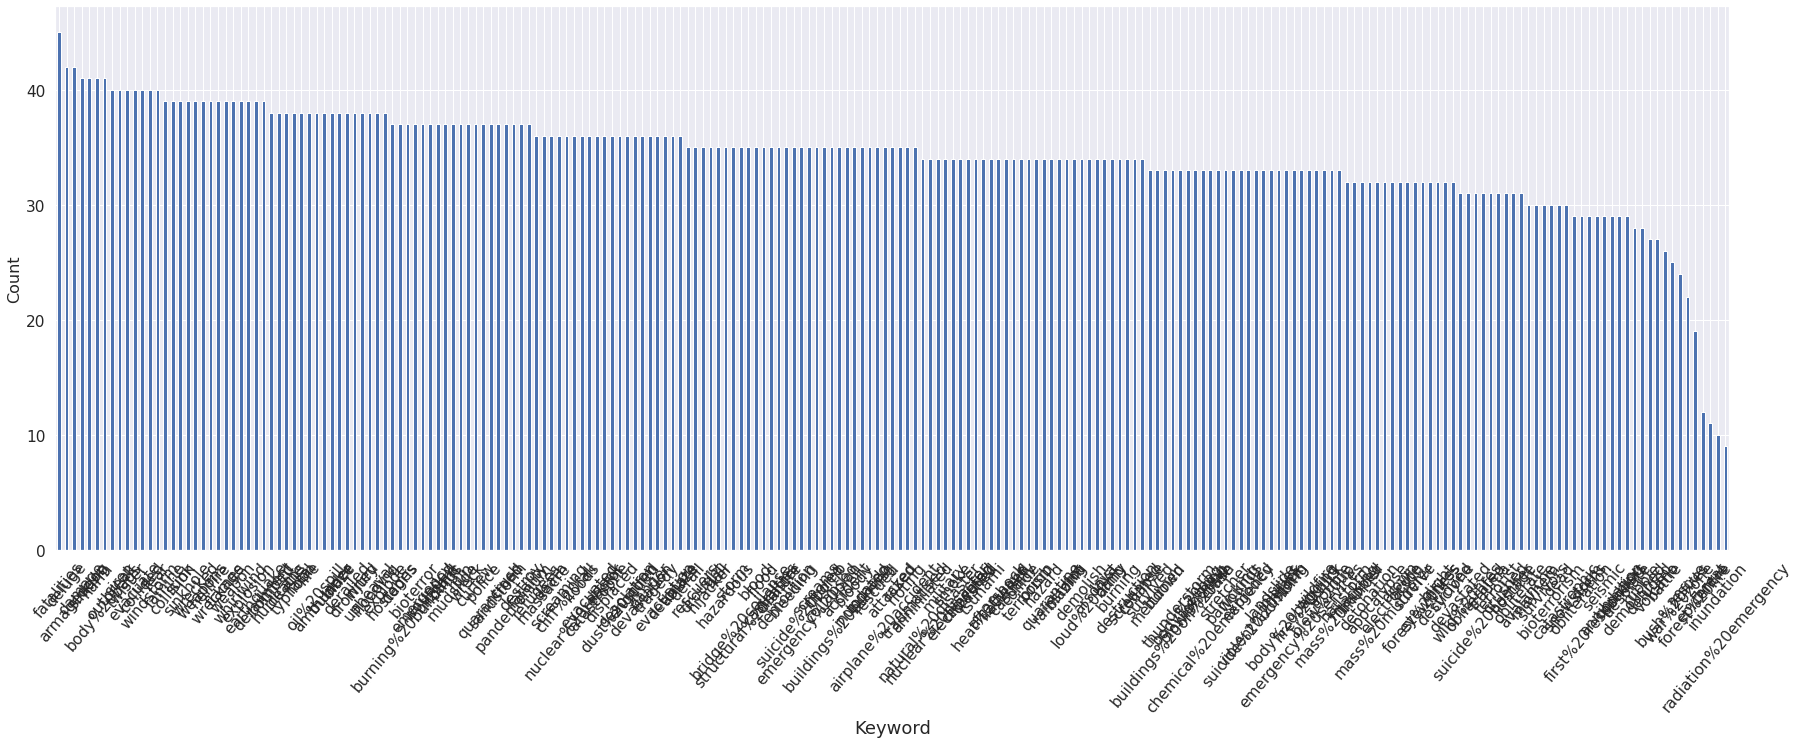

In [268]:
plt.rcParams["figure.figsize"] = (30, 10)
pd.value_counts(data['keyword']).plot.bar()
plt.xticks(rotation=50)
plt.xlabel('Keyword', fontsize=18)
plt.ylabel('Count', fontsize=16)

Is there any correlation of the length of a tweet with its target. Try to visualize

Removing null values
Removing Double Spaces, Hyphens and arrows, Emojis, URL, another   Non-English or special symbol
Replace wrong spellings with correct ones
Plot a word cloud of the real and fake target
Remove all columns except text and target
Split data into train and validation


In [269]:
data["text"].dtypes

dtype('O')

In [270]:
data["text length"]= data["text"].str.len()

In [271]:
data.head()

,id,keyword,location,text,target,text length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [272]:
data["text length"].min()

7

In [273]:
data[['text length']].idxmin()

text length    1882
dtype: int64

In [274]:
data.iloc[1880:1885]

,id,keyword,location,text,target,text length
1880,2701,crush,NaN,do he love me do he love me not I ain't a play...,0,66
1881,2702,crush,NaN,kenny holland crush da vida,0,27
1882,2703,crushed,NaN,Crushed,0,7
1883,2706,crushed,NaN,this Popeyes bout to get crushed ??,0,35
1884,2707,crushed,11/4/14,That was crushed holy shit,0,26


In [275]:
data['text length'].corr(data['target'])

0.18181684254460748

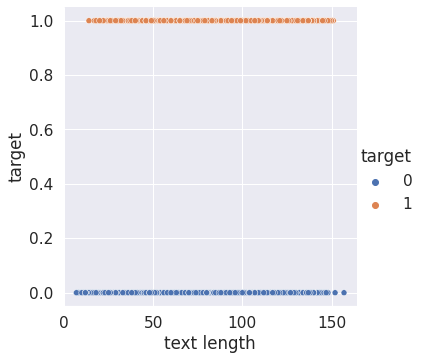

In [276]:
sns.relplot(x=data["text length"], y="target", hue="target", data=data)

Print the number of null values in each column

In [277]:
data.isna().sum()

id                0
keyword          61
location       2533
text              0
target            0
text length       0
dtype: int64

Remove the null values

In [278]:
data = data.dropna(axis = 0)

In [279]:
data.shape

(5080, 6)

Remove:


1.   Double Spaces
2.   Hypens and arrows
3.   Emojis
4.   URL
5.   Any other non english or special symbol

Replace wrong spellings with correct spellings



In [280]:
# lower casing
data["text_lower"] = data["text"].str.lower()
data.head()

,id,keyword,location,text,target,text length,text_lower
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55,@bbcmtd wholesale markets ablaze http://t.co/l...
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67,we always try to bring the heavy. #metal #rt h...
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82,#africanbaze: breaking news:nigeria flag set a...
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34,crying out for more! set me ablaze
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76,on plus side look at the sky last night it was...


In [281]:
# remove urls
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

data["text_wo_urls"] = data["text_lower"].apply(lambda text: remove_urls(text))

In [282]:
# remove emojis
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

data["text_wo_urls_emojis"] = data["text_wo_urls"].apply(lambda text: remove_emoji(text))


In [283]:
# remove punctuation
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

data["text_wo_punct_urls_emojis"] = data["text_wo_urls_emojis"].apply(lambda text: remove_punctuation(text))



In [284]:
# remove double spaces
def remove_double_space(text):
    """custom function to remove the double space"""
    return re.sub("\s\s"," ",text)
data["text_wo_punct_urls_doubSpace_emojis"] = data["text_wo_punct_urls_emojis"].apply(lambda text: remove_double_space(text))



In [285]:
# remove nonenglish
def remove_non_english(text):
    """custom function to remove the double space"""
    return re.sub("[^a-zA-Z]"," ",text)
data["text_wo_punct_urls_doubSpace_emojis_nonEng"] = data["text_wo_punct_urls_doubSpace_emojis"].apply(lambda text: remove_non_english(text))

In [286]:
!pip install pyspellchecker

In [287]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
text = "speling correctin"
correct_spellings(text)

'spelling correcting'

In [288]:
# data["text_wo_punct_urls_doubSpace_emojis_nonEng"] = data["text_wo_punct_urls_doubSpace_emojis_nonEng"].apply(lambda text: correct_spellings(text))

Plot a word cloud of real target and fake target

In [289]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [290]:
text = " ".join(word for word in data.text_wo_punct_urls_doubSpace_emojis_nonEng)
print ("There are {} words in the whole data(including repeted words).".format(len(text.split())))

There are 71168 words in the whole data(including repeted words).


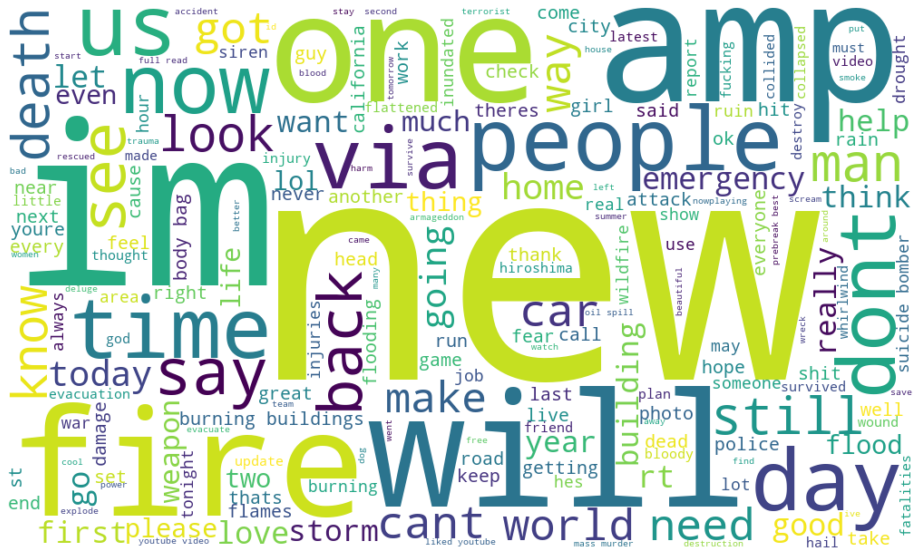

In [291]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white",width=1000, height=600).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [292]:
def visualize(label):
  words = ''
  for msg in data[data['target'] == label]['text_wo_punct_urls_doubSpace_emojis_nonEng']:
    words += msg + ' '
  wordcloud = WordCloud(stopwords=stopwords, background_color="white",width=1000, height=600).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()


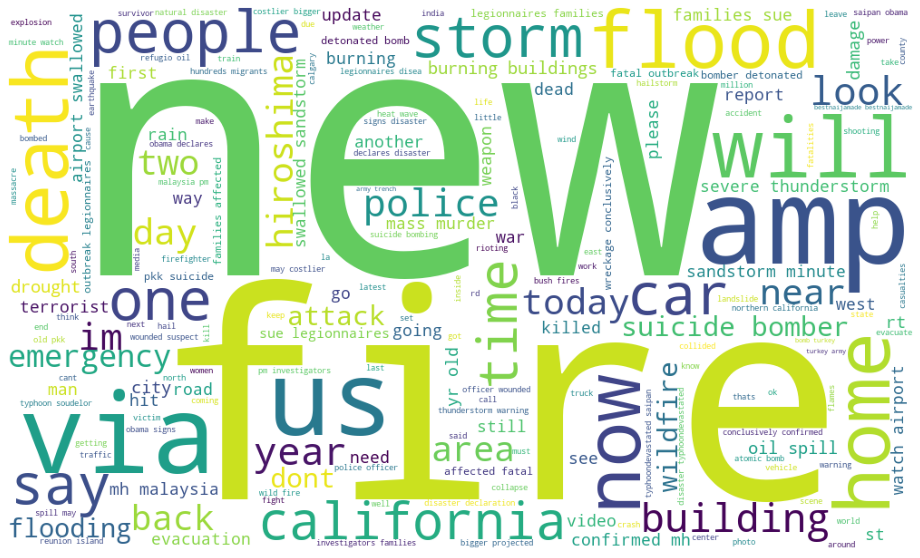

In [293]:
visualize(1)

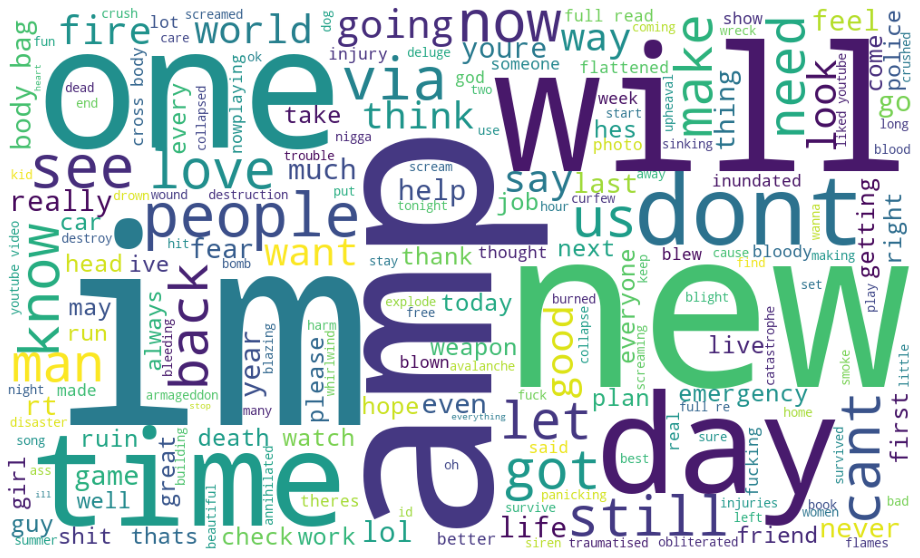

In [294]:
visualize(0)

Keep only text and target column in the dataset

In [295]:
data = data[['text_wo_punct_urls_doubSpace_emojis_nonEng','target']]

In [296]:
data.head()

,text_wo_punct_urls_doubSpace_emojis_nonEng,target
31,bbcmtd wholesale markets ablaze,1
32,we always try to bring the heavy metal rt,0
33,africanbaze breaking newsnigeria flag set abla...,1
34,crying out for more set me ablaze,0
35,on plus side look at the sky last night it was...,0


In [297]:
data.shape

(5080, 2)

Split data into train and validation

In [298]:
X = data['text_wo_punct_urls_doubSpace_emojis_nonEng']
y = data[['target']]

In [299]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
X_train.shape

(4064,)

In [300]:
X_test.shape

(1016,)

Print the count of unique words

In [301]:
text

'bbcmtd wholesale markets ablaze  we always try to bring the heavy metal rt  africanbaze breaking newsnigeria flag set ablaze in aba  crying out for more set me ablaze on plus side look at the sky last night it was ablaze  phdsquares mufc theyve built so much hype around new acquisitions but i doubt they will set the epl ablaze this season inec office in abia set ablaze  ablaze for you lord d check these out   nsfw had an awesome time visiting the cfc head office the ancop site and ablaze thanks to tita vida for taking care of us  how the west was burned thousands of wildfires ablaze in california alone  check these out   nsfw first night with retainers in its quite weird better get used to it i have to wear them every single night for the next year at least deputies man shot before brighton home set ablaze  man wife get six years jail for setting ablaze niece  santa cruz     head of the st elizabeth police superintendent lanford salmon has r   police arsonist deliberately set black ch

In [302]:
from collections import Counter

print(Counter(text.split()))

Counter({'the': 2210, 'a': 1505, 'in': 1349, 'to': 1326, 'of': 1252, 'i': 971, 'and': 957, 'for': 614, 'is': 605, 'on': 581, 'you': 533, 'my': 429, 'it': 425, 'that': 399, 'with': 398, 'at': 379, 'by': 342, 'this': 332, 'from': 287, 'be': 282, 'are': 279, 'have': 277, 'was': 274, 'as': 239, 'like': 233, 'but': 230, 'just': 221, 'im': 211, 'up': 209, 'so': 205, 'not': 205, 'your': 200, 'amp': 197, 'me': 193, 'will': 192, 'out': 182, 'new': 179, 'its': 179, 'fire': 173, 'an': 172, 'we': 169, 'has': 168, 'when': 167, 'all': 167, 'after': 166, 'now': 160, 'if': 159, 'via': 159, 'no': 158, 'get': 155, 'about': 149, 'what': 144, 'he': 143, 'more': 138, 'people': 134, 'or': 129, 'news': 127, 'one': 125, 'dont': 124, 'how': 121, 'been': 121, 'they': 120, 'emergency': 120, 'who': 118, 'do': 116, 'over': 116, 'were': 115, 'us': 114, 's': 114, 'into': 112, 'can': 106, 'there': 106, 'police': 105, 'video': 104, 'disaster': 98, 'than': 94, 'some': 92, 'still': 90, 'time': 88, 'would': 88, 'building

In [303]:
unique_in_doc= len(Counter(text.split()))

In [304]:
unique_in_doc

13151

Compute the Term-Document Matrix (TDM) for all classes.

Print the dataframe with number of columns = number of unique words and the row showing the count of that word in a sentence.

In [305]:
train_df = X_train.to_frame()
train_df['target']=y_train

In [306]:
train_df.shape

(4064, 2)

In [307]:
train_df.head()

,text_wo_punct_urls_doubSpace_emojis_nonEng,target
2440,service on the green line has resumed after an...,1
3943,chinese rescue team arrives in myanmar to help...,1
818,i really wants a rolo blizzard but mom said no...,0
2406,of what use exactly is the national assembly h...,0
6531,survived another tube strike with the last per...,0


In [308]:
# for train_data
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer()
countvec.fit_transform(train_df.text_wo_punct_urls_doubSpace_emojis_nonEng)

<4064x11427 sparse matrix of type '<class 'numpy.int64'>'
	with 51805 stored elements in Compressed Sparse Row format>

In [309]:
tdm_train = pd.DataFrame(countvec.fit_transform(train_df.text_wo_punct_urls_doubSpace_emojis_nonEng).toarray(), columns=countvec.get_feature_names())

In [310]:
tdm_train.head()

,aaaa,aaaaaand,aal,aannnnd,aar,aaronthefm,aba,abandon,abandoned,abbruchsimulator,abbswinston,abbyairshow,abc,abcnews,abcnorio,abe,aberdeenfanpage,aberdeenfc,aberystwythshrewsbury,abes,abha,abia,abject,ablaze,able,ableg,abninfvet,abomb,abombed,abomination,abortion,about,above,absolute,absolutely,abstorm,abstract,abuse,abused,abuseddesolateamplost,...,yyc,yycstorm,yycwalks,yyj,yzf,zaatari,zaire,zakbagans,zakuun,zaman,zamtriossu,zarharzar,zarry,zayn,zeal,zenit,zeno,zepp,zergele,zero,zimbabwe,zimmer,zionism,zionist,zip,zippoline,zodiac,zojadelin,zomatoaus,zombie,zombiefunrun,zombies,zone,zones,zotar,zouma,zss,zumiez,zxathetis,zzzz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [311]:
rows_train = tdm_train.shape[0]

In [312]:
frequency = tdm_train.sum()

In [313]:
frequency
frequency.name = 'frequency'

In [314]:
tdm_train.drop(tdm_train.index[[i for i in range (rows_train)]],inplace=True)
tdm_train.head()

,aaaa,aaaaaand,aal,aannnnd,aar,aaronthefm,aba,abandon,abandoned,abbruchsimulator,abbswinston,abbyairshow,abc,abcnews,abcnorio,abe,aberdeenfanpage,aberdeenfc,aberystwythshrewsbury,abes,abha,abia,abject,ablaze,able,ableg,abninfvet,abomb,abombed,abomination,abortion,about,above,absolute,absolutely,abstorm,abstract,abuse,abused,abuseddesolateamplost,...,yyc,yycstorm,yycwalks,yyj,yzf,zaatari,zaire,zakbagans,zakuun,zaman,zamtriossu,zarharzar,zarry,zayn,zeal,zenit,zeno,zepp,zergele,zero,zimbabwe,zimmer,zionism,zionist,zip,zippoline,zodiac,zojadelin,zomatoaus,zombie,zombiefunrun,zombies,zone,zones,zotar,zouma,zss,zumiez,zxathetis,zzzz


In [315]:
tdm_train = tdm_train.append(frequency.transpose())

In [316]:
tdm_train.head()

,aaaa,aaaaaand,aal,aannnnd,aar,aaronthefm,aba,abandon,abandoned,abbruchsimulator,abbswinston,abbyairshow,abc,abcnews,abcnorio,abe,aberdeenfanpage,aberdeenfc,aberystwythshrewsbury,abes,abha,abia,abject,ablaze,able,ableg,abninfvet,abomb,abombed,abomination,abortion,about,above,absolute,absolutely,abstorm,abstract,abuse,abused,abuseddesolateamplost,...,yyc,yycstorm,yycwalks,yyj,yzf,zaatari,zaire,zakbagans,zakuun,zaman,zamtriossu,zarharzar,zarry,zayn,zeal,zenit,zeno,zepp,zergele,zero,zimbabwe,zimmer,zionism,zionist,zip,zippoline,zodiac,zojadelin,zomatoaus,zombie,zombiefunrun,zombies,zone,zones,zotar,zouma,zss,zumiez,zxathetis,zzzz
frequency,1,1,1,1,1,1,9,2,4,1,2,1,9,2,1,1,1,1,1,1,1,2,1,17,4,1,1,2,1,1,2,124,3,1,7,6,1,5,1,2,...,8,1,1,1,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,4,1,1,18,1,1,3,2,1,1,1


In [317]:
data_target_zero = X_train[y_train['target']==0]
data_target_zero= data_target_zero.to_frame()
data_target_zero['target']= 0

In [318]:
# for train_data with target as zero
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer()
countvec.fit_transform(data_target_zero.text_wo_punct_urls_doubSpace_emojis_nonEng)

<2321x7952 sparse matrix of type '<class 'numpy.int64'>'
	with 29453 stored elements in Compressed Sparse Row format>

In [319]:
tdm_train_zero = pd.DataFrame(countvec.fit_transform(data_target_zero.text_wo_punct_urls_doubSpace_emojis_nonEng).toarray(), columns=countvec.get_feature_names())

In [320]:
rows_zero = tdm_train_zero.shape[0]

In [321]:
tdm_train_zero.head()

,aaaa,aannnnd,aar,aaronthefm,aba,abandon,abbruchsimulator,abc,abcnews,aberdeenfanpage,aberdeenfc,abject,ablaze,able,abomination,abortion,about,above,absolutely,abstract,abuse,abused,abuseddesolateamplost,abysmaljoiner,ac,acarewornheart,accept,accepts,access,accident,accidentally,accidentalprophecy,accidently,accidents,according,account,accused,accustomed,acebabes,acesse,...,youngsafe,your,youre,yours,yourself,youssefyamani,youth,youtube,youve,yrs,yuan,yukis,yum,yunita,yup,yuuko,yuvi,zaire,zakbagans,zamtriossu,zarharzar,zarry,zayn,zenit,zeno,zepp,zero,zimbabwe,zip,zippoline,zodiac,zombie,zombiefunrun,zombies,zone,zouma,zss,zumiez,zxathetis,zzzz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [322]:
frequency_zero = tdm_train_zero.sum()

In [323]:
frequency_zero.name = 'frequency_zero'

In [324]:
tdm_train_zero.drop(tdm_train_zero.index[[i for i in range (rows_zero)]],inplace=True)
tdm_train_zero.head()

,aaaa,aannnnd,aar,aaronthefm,aba,abandon,abbruchsimulator,abc,abcnews,aberdeenfanpage,aberdeenfc,abject,ablaze,able,abomination,abortion,about,above,absolutely,abstract,abuse,abused,abuseddesolateamplost,abysmaljoiner,ac,acarewornheart,accept,accepts,access,accident,accidentally,accidentalprophecy,accidently,accidents,according,account,accused,accustomed,acebabes,acesse,...,youngsafe,your,youre,yours,yourself,youssefyamani,youth,youtube,youve,yrs,yuan,yukis,yum,yunita,yup,yuuko,yuvi,zaire,zakbagans,zamtriossu,zarharzar,zarry,zayn,zenit,zeno,zepp,zero,zimbabwe,zip,zippoline,zodiac,zombie,zombiefunrun,zombies,zone,zouma,zss,zumiez,zxathetis,zzzz


In [325]:
tdm_train_zero = tdm_train_zero.append(frequency_zero.transpose())

In [326]:
tdm_train_zero.head()

,aaaa,aannnnd,aar,aaronthefm,aba,abandon,abbruchsimulator,abc,abcnews,aberdeenfanpage,aberdeenfc,abject,ablaze,able,abomination,abortion,about,above,absolutely,abstract,abuse,abused,abuseddesolateamplost,abysmaljoiner,ac,acarewornheart,accept,accepts,access,accident,accidentally,accidentalprophecy,accidently,accidents,according,account,accused,accustomed,acebabes,acesse,...,youngsafe,your,youre,yours,yourself,youssefyamani,youth,youtube,youve,yrs,yuan,yukis,yum,yunita,yup,yuuko,yuvi,zaire,zakbagans,zamtriossu,zarharzar,zarry,zayn,zenit,zeno,zepp,zero,zimbabwe,zip,zippoline,zodiac,zombie,zombiefunrun,zombies,zone,zouma,zss,zumiez,zxathetis,zzzz
frequency_zero,1,1,1,1,4,1,1,2,1,1,1,1,9,3,1,1,82,1,7,1,3,1,1,1,1,1,1,1,2,15,1,1,1,2,2,5,1,2,1,1,...,1,124,30,3,7,1,2,37,3,3,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,4,1,1,15,3,2,1,1,1


In [327]:
data_target_one = X_train[y_train['target']==1]
data_target_one= data_target_one.to_frame()
data_target_one['target']= 1

In [328]:
# for train_data with target as zero
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer()
countvec.fit_transform(data_target_one.text_wo_punct_urls_doubSpace_emojis_nonEng)

<1743x5993 sparse matrix of type '<class 'numpy.int64'>'
	with 22352 stored elements in Compressed Sparse Row format>

In [329]:
tdm_train_one = pd.DataFrame(countvec.fit_transform(data_target_one.text_wo_punct_urls_doubSpace_emojis_nonEng).toarray(), columns=countvec.get_feature_names())

In [330]:
rows_one = tdm_train_one.shape[0]

In [331]:
tdm_train_one.head()

,aaaaaand,aal,aba,abandon,abandoned,abbswinston,abbyairshow,abc,abcnews,abcnorio,abe,aberystwythshrewsbury,abes,abha,abia,ablaze,able,ableg,abninfvet,abomb,abombed,abortion,about,above,absolute,abstorm,abuse,abuseddesolateamplost,abuses,abusing,ac,accept,accident,accidentally,accidents,accidentwho,according,account,accuracy,accused,...,yobe,yolandaph,yonews,york,yorker,you,youll,young,younger,your,youre,yours,yourself,yourselves,youth,youtube,youve,ypres,yr,yrs,yugvani,yyc,yycstorm,yycwalks,yyj,yzf,zaatari,zakbagans,zakuun,zaman,zeal,zergele,zimmer,zionism,zionist,zojadelin,zomatoaus,zone,zones,zotar
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [332]:
frequency_one = tdm_train_one.sum()

In [333]:
frequency_one.name = 'frequency_one'

In [334]:
tdm_train_one.drop(tdm_train_one.index[[i for i in range (rows_one)]],inplace=True)
tdm_train_one.head()

,aaaaaand,aal,aba,abandon,abandoned,abbswinston,abbyairshow,abc,abcnews,abcnorio,abe,aberystwythshrewsbury,abes,abha,abia,ablaze,able,ableg,abninfvet,abomb,abombed,abortion,about,above,absolute,abstorm,abuse,abuseddesolateamplost,abuses,abusing,ac,accept,accident,accidentally,accidents,accidentwho,according,account,accuracy,accused,...,yobe,yolandaph,yonews,york,yorker,you,youll,young,younger,your,youre,yours,yourself,yourselves,youth,youtube,youve,ypres,yr,yrs,yugvani,yyc,yycstorm,yycwalks,yyj,yzf,zaatari,zakbagans,zakuun,zaman,zeal,zergele,zimmer,zionism,zionist,zojadelin,zomatoaus,zone,zones,zotar


In [335]:
tdm_train_one = tdm_train_one.append(frequency_one.transpose())

In [336]:
tdm_train_one.head()

,aaaaaand,aal,aba,abandon,abandoned,abbswinston,abbyairshow,abc,abcnews,abcnorio,abe,aberystwythshrewsbury,abes,abha,abia,ablaze,able,ableg,abninfvet,abomb,abombed,abortion,about,above,absolute,abstorm,abuse,abuseddesolateamplost,abuses,abusing,ac,accept,accident,accidentally,accidents,accidentwho,according,account,accuracy,accused,...,yobe,yolandaph,yonews,york,yorker,you,youll,young,younger,your,youre,yours,yourself,yourselves,youth,youtube,youve,ypres,yr,yrs,yugvani,yyc,yycstorm,yycwalks,yyj,yzf,zaatari,zakbagans,zakuun,zaman,zeal,zergele,zimmer,zionism,zionist,zojadelin,zomatoaus,zone,zones,zotar
frequency_one,1,1,5,1,4,2,1,7,1,1,1,1,1,1,2,8,1,1,1,2,1,1,42,2,1,6,2,1,1,2,1,1,46,3,3,1,1,4,1,1,...,4,1,1,7,1,75,1,5,1,35,7,1,1,1,5,9,1,2,15,3,1,8,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,3,1,1


Frequency of words in class 0 and 1

In [337]:
text_target_zero =  " ".join(word for word in data_target_zero.text_wo_punct_urls_doubSpace_emojis_nonEng)
print ("There are {} words in train_data for which target=0 (including repeted words).".format(len(text_target_zero.split())))
words_in_class_zero = len(text_target_zero.split())

There are 32403 words in train_data for which target=0 (including repeted words).


In [338]:
text_target_one = " ".join(word for word in data_target_one.text_wo_punct_urls_doubSpace_emojis_nonEng)
print ("There are {} words in train_data for which target=1 (including repeted words)".format(len(text_target_one.split())))
words_in_class_one = len(text_target_one.split())

There are 24322 words in train_data for which target=1 (including repeted words)


In [339]:
text_train = " ".join(word for word in train_df.text_wo_punct_urls_doubSpace_emojis_nonEng)
print ("There are {} words in the overall train_data (including repeted words)".format(len(text_train.split())))
words_in_train= len(text_train.split())

There are 56725 words in the overall train_data (including repeted words)


In [340]:
cnt_zero = Counter(text_target_zero.split())
print(Counter(text_target_zero.split()))

Counter({'the': 1010, 'a': 697, 'to': 656, 'i': 606, 'of': 506, 'and': 488, 'in': 451, 'you': 359, 'is': 305, 'my': 291, 'for': 277, 'on': 236, 'it': 216, 'that': 215, 'with': 202, 'be': 164, 'this': 163, 'have': 147, 'im': 146, 'by': 138, 'at': 135, 'me': 135, 'but': 131, 'like': 129, 'are': 128, 'just': 128, 'so': 124, 'your': 124, 'was': 122, 'not': 118, 'new': 112, 'will': 110, 'out': 107, 'from': 107, 'if': 103, 'as': 99, 'all': 97, 'up': 94, 'amp': 90, 'its': 90, 'he': 88, 'we': 85, 'now': 85, 'get': 84, 'has': 84, 'about': 82, 'or': 78, 'no': 77, 'what': 74, 'dont': 73, 'do': 71, 'when': 70, 'how': 69, 'can': 68, 'an': 67, 'they': 62, 'one': 61, 'body': 60, 'via': 56, 'know': 54, 'people': 53, 'full': 52, 'would': 51, 'more': 51, 'into': 51, 'who': 50, 'us': 50, 'video': 49, 'see': 48, 'his': 48, 'been': 48, 'her': 48, 'why': 47, 'there': 47, 'emergency': 47, 'back': 46, 'got': 44, 'day': 44, 'cant': 43, 'love': 42, 'going': 42, 'man': 41, 'some': 41, 'time': 41, 'them': 41, 'wo

In [341]:
dict_zero = {}
for key, value in cnt_zero.items():
    dict_zero[key] = value

In [342]:
cnt_one = Counter(text_target_one.split())
print(Counter(text_target_one.split()))

Counter({'the': 727, 'in': 625, 'a': 506, 'of': 496, 'to': 390, 'and': 276, 'on': 243, 'for': 208, 'at': 188, 'is': 182, 'i': 173, 'by': 140, 'from': 118, 'with': 115, 'it': 111, 'this': 111, 'that': 106, 'are': 96, 'fire': 95, 'was': 93, 'as': 89, 'after': 87, 'via': 77, 'you': 75, 'have': 73, 'up': 71, 'were': 66, 'police': 65, 'news': 64, 'an': 61, 'when': 60, 'be': 60, 'over': 59, 'disaster': 59, 'my': 58, 'but': 57, 'amp': 57, 's': 54, 'its': 53, 'people': 53, 'pm': 52, 'more': 52, 'just': 52, 'buildings': 51, 'like': 51, 'killed': 50, 'california': 50, 'who': 50, 'no': 49, 'families': 49, 'not': 49, 'has': 48, 'we': 47, 'been': 47, 'hiroshima': 46, 'emergency': 46, 'accident': 46, 'out': 45, 'get': 45, 'two': 45, 'us': 45, 'crash': 44, 'than': 43, 'train': 43, 'attack': 42, 'burning': 42, 'suicide': 42, 'into': 42, 'about': 42, 'now': 41, 'storm': 41, 'will': 40, 'all': 39, 'fires': 38, 'so': 37, 'bomb': 36, 'video': 36, 'legionnaires': 36, 'he': 36, 'watch': 36, 'nuclear': 35, '

In [343]:
dict_one = {}
for key, value in cnt_one.items():
    dict_one[key] = value

In [344]:
cnt_train = Counter(text_train.split())
print(Counter(text_train.split()))

Counter({'the': 1737, 'a': 1203, 'in': 1076, 'to': 1046, 'of': 1002, 'i': 779, 'and': 764, 'is': 487, 'for': 485, 'on': 479, 'you': 434, 'my': 349, 'it': 327, 'at': 323, 'that': 321, 'with': 317, 'by': 278, 'this': 274, 'from': 225, 'are': 224, 'be': 224, 'have': 220, 'was': 215, 'but': 188, 'as': 188, 'like': 180, 'just': 180, 'im': 177, 'not': 167, 'up': 165, 'me': 163, 'so': 161, 'your': 159, 'out': 152, 'will': 150, 'amp': 147, 'new': 143, 'its': 143, 'all': 136, 'if': 134, 'via': 133, 'has': 132, 'we': 132, 'fire': 132, 'when': 130, 'get': 129, 'an': 128, 'no': 126, 'now': 126, 'he': 124, 'about': 124, 'after': 123, 'or': 109, 'what': 107, 'people': 106, 'more': 103, 'dont': 101, 'who': 100, 'they': 97, 'do': 95, 'news': 95, 'been': 95, 'us': 95, 'how': 93, 'emergency': 93, 'one': 93, 'were': 93, 'into': 93, 'over': 90, 's': 90, 'police': 88, 'video': 85, 'can': 84, 'disaster': 81, 'than': 73, 'some': 73, 'there': 72, 'know': 71, 'man': 70, 'back': 69, 'buildings': 68, 'still': 67

In [345]:
dict_train = {}
for key, value in cnt_train.items():
    dict_train[key] = value

Does the sum of the unique words in target 0 and 1 sum upto the total number of unique words in the whole document? Why or why not? Explain in report.

Total frequency

In [346]:
unique_in_target_zero = len(Counter(text_target_zero.split()))

In [347]:
unique_in_target_zero 

7978

In [348]:
unique_in_target_one = len(Counter(text_target_one.split()))

In [349]:
unique_in_target_one

6016

In [350]:
unique_in_target_one + unique_in_target_zero

13994

In [351]:
unique_in_train = len(Counter(text_train.split()))

In [352]:
unique_in_train

11453

Calculate the probability for each word in a given class.

Class 0

In [353]:
# words_in_class_zero
# words_in_class_one
word_list_zero = []
prob_zero = []
for word in dict_zero :
 prob =  dict_zero[word] / words_in_class_zero
 word_list_zero.append(word)
 prob_zero.append(prob)

prob_word_zero = dict(zip(word_list_zero, prob_zero))

Class 1

In [354]:
word_list_one = []
prob_one = []
for word in dict_one :
 prob =  dict_one[word] / words_in_class_one
 word_list_one.append(word)
 prob_one.append(prob)

prob_word_one = dict(zip(word_list_one, prob_one))

We have calculated the probability of occurrence of word in a class, we can now substitute the values in the Baye's equation. 

If a word from the new sentence does not occur in the class within the training set, the equation becomes zero. This problem can be solved using smoothing like Laplace smoothing. 

In [355]:
N_target_zero = sum(dict_zero.values())
N_target_one =sum(dict_one.values())
alpha =1
k = 2


In [356]:
# prior probs
prior_zero = data_target_zero.shape[0]/len(X_train)
prior_zero

0.5711122047244095

In [357]:
prior_one = data_target_one.shape[0]/len(X_train)
prior_one

0.42888779527559057

In [358]:
# for validation set 
test_df = X_test.to_frame()
test_df['target']=y_test


Probability for class 0

In [359]:
# on test data
prob_class_zero = []
for column in test_df['text_wo_punct_urls_doubSpace_emojis_nonEng']:
  text_col = column.split()
  likelihood = 1
  for word in text_col :
    if word in prob_word_zero :
      likelihood = likelihood * ((prob_word_zero[word] + alpha)/ (N_target_zero + alpha*k))
    else :
      likelihood = likelihood * (alpha/ N_target_zero + alpha*k)
  numerator = likelihood * prior_zero
  prob_class_zero.append(numerator)

In [360]:
len(prob_class_zero)

1016

Probability for class 1

In [361]:
# on test data
prob_class_one = []
for column in test_df['text_wo_punct_urls_doubSpace_emojis_nonEng']:
  text_col = column.split()
  likelihood = 1
  for word in text_col :
    if word in prob_word_one :
      likelihood = likelihood * ((prob_word_one[word] + alpha)/ (N_target_one + alpha*k))
    else :
      likelihood = likelihood * (alpha/ N_target_one + alpha*k)
  numerator = likelihood * prior_one
  prob_class_one.append(numerator)

In [362]:
len(prob_class_one)

1016

Print target class

In [363]:
y_pred= []
for i in range (test_df.shape[0]):
  if(prob_class_zero[i] > prob_class_one[i]):
   y_pred.append(0)
  else:
   y_pred.append(1)

  

In [364]:
test_df['target_pred']=y_pred

In [365]:
test_df.head(80)

,text_wo_punct_urls_doubSpace_emojis_nonEng,target,target_pred
3389,update more from bend fd on how a natural gas ...,1,0
5954,estellasrevenge the first time i went swiming ...,0,1
2650,furiosoxv stuns also probably wont be anything...,0,1
4793,nikoniko breaking news unconfirmed i just...,0,1
6048,talk on goz is fantastic most interesting fact...,0,1
...,...,...,...
390,wait what,0,1
2615,danhrothschild greed is the fuel of selfdestru...,0,0
6462,i peeped you frontin i was in the jeep sunk i...,0,1
3894,fylde building set to be flattened one of pres...,0,1


In [366]:
y_pred

[0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,


In [367]:
import seaborn as sn
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))
    plt.figure(figsize = (10,7))
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, annot=True,fmt='.0f',annot_kws={"size": 10})
    plt.show()

              precision    recall  f1-score   support

           0    0.26284   0.15453   0.19463       563
           1    0.30511   0.46137   0.36731       453

    accuracy                        0.29134      1016
   macro avg    0.28397   0.30795   0.28097      1016
weighted avg    0.28169   0.29134   0.27162      1016



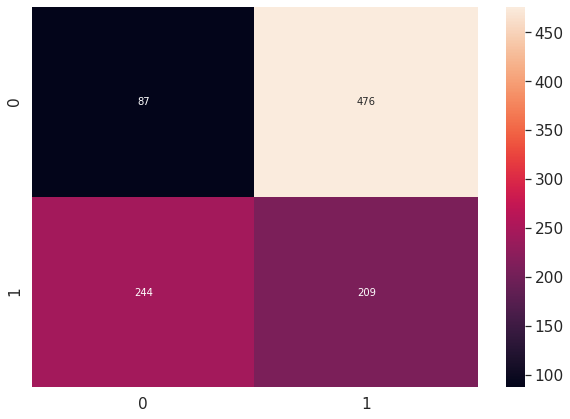

In [368]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred,  digits=5))
plot_confusion_matrix(y_test, y_pred)


<!-- We have calculated the probability of occurrence of the word in a class, we can now substitute the values in the Bayes equation. If a word from the new sentence does not occur in the class within the training set, the equation becomes zero. This problem can be solved using smoothing like Laplace smoothing. Use Bayes with Laplace smoothing to predict the probability for sentences in the validation set.                                 [6 marks]
Print the confusion matrix with precision, recall and f1 score.                -->


References:

[Ref1](https://sebastianraschka.com/Articles/2014_naive_bayes_1.html)